In [ ]:
# binary_dilation

In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime

start=datetime.now()

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=28*28, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
# 可以試試這樣做 僅是部分資料
from tqdm import tqdm # 跑出步近圖
import numpy as np
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import exposure
from skimage.transform import rescale
from skimage import morphology

X_train_skimage = np.array([morphology.binary_dilation(x) for x in X_train[:]]) # <--核心價值 change me
X_test_skimage = np.array([morphology.binary_dilation(x) for x in X_test[:]])  # <--核心價值 change me
print('Preprocessed by skimage.rescale')

Preprocessed by skimage.rescale
Wall time: 6.25 s


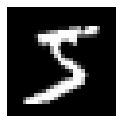

In [ ]:
# 劃出一 原來圖片
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

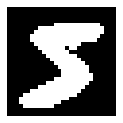

Data range after preprocessed False True


In [ ]:
# 劃出一圖片
plt.figure(figsize=(2,2))
plt.imshow(X_train_skimage[0], cmap='gray')
plt.axis('off')
plt.show()
print('Data range after preprocessed', X_train_skimage[0].min(), X_train_skimage[0].max())

In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train = X_train_skimage #<--------------preprocessed by skimage
X_test  = X_test_skimage  #<--------------preprocessed by skimage

X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  #< -----
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')    #< -----

x_Train_norm = X_train_2D # /255.0  #<-------取消
x_Test_norm = X_test_2D   # /255.0  #<-------取消

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=40, 
                          batch_size=800, verbose=2)  

Epoch 1/40
60/60 - 3s - loss: 0.9468 - accuracy: 0.7523 - val_loss: 0.4296 - val_accuracy: 0.8758
Epoch 2/40
60/60 - 1s - loss: 0.4034 - accuracy: 0.8782 - val_loss: 0.3417 - val_accuracy: 0.8978
Epoch 3/40
60/60 - 1s - loss: 0.3372 - accuracy: 0.8984 - val_loss: 0.3020 - val_accuracy: 0.9078
Epoch 4/40
60/60 - 2s - loss: 0.2981 - accuracy: 0.9094 - val_loss: 0.2737 - val_accuracy: 0.9148
Epoch 5/40
60/60 - 2s - loss: 0.2677 - accuracy: 0.9185 - val_loss: 0.2484 - val_accuracy: 0.9222
Epoch 6/40
60/60 - 1s - loss: 0.2413 - accuracy: 0.9262 - val_loss: 0.2312 - val_accuracy: 0.9272
Epoch 7/40
60/60 - 0s - loss: 0.2222 - accuracy: 0.9319 - val_loss: 0.2213 - val_accuracy: 0.9293
Epoch 8/40
60/60 - 1s - loss: 0.2065 - accuracy: 0.9371 - val_loss: 0.2117 - val_accuracy: 0.9330
Epoch 9/40
60/60 - 0s - loss: 0.1943 - accuracy: 0.9411 - val_loss: 0.1989 - val_accuracy: 0.9367
Epoch 10/40
60/60 - 1s - loss: 0.1806 - accuracy: 0.9449 - val_loss: 0.1967 - val_accuracy: 0.9342
Epoch 11/40
60/60 -

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 3s 9ms/step - loss: 0.1375 - accuracy: 0.9602

	[Info] Accuracy of testing data = 96.0%


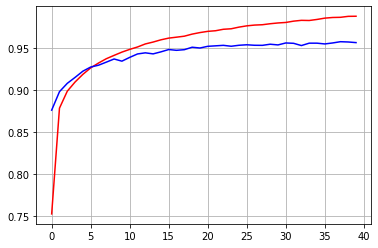

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

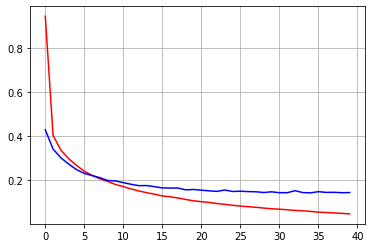

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()